***Цели и задачи проекта.***

Выявить абонентов склонных перестать пользоваться услугами компании

1. Провести анализ данных абонентов сотовой связи
2. Построить модель на основе подготовленных и анализированных данных
3. Выявить абонентов склонных покинуть компанию
4. Построить на основе полученных данных экономическую модель 
5. Оценить результаты работы

В качестве основной метрики был выбран ROC-AUC, потому что имеем дело с несбалансированной выборкой. Из всех моделей на кросс-валидации
лучше себя показал градиентный бустинг, что неудивительно, поэтому для дальнейшей работы использовался именно он. Для поиска оптимимальных гиперпараметров использовался RandomSearchCV

In [ ]:
import numpy as np

param_distributions={'n_estimators': range(100, 600, 200),
                    'max_depth': range(2, 5),
                    'learning_rate': np.arange(0.1, 1, 0.2)} #множество параметров, среди которых искались наилучшие

Лучшими параметрами оказались: max_depth=2, n_estimators=300, learning_rate=0.1. Результат в соревновании на кэггле. 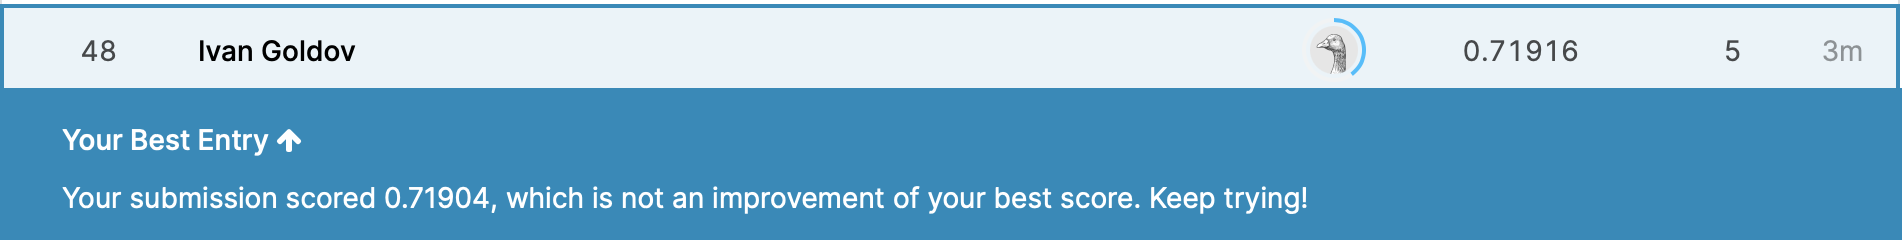

Была построена экономическая модель, с помощью которой удалось сделать вывод, что чем выше стоимость удержания пользователя, тем меньше оптимальный размера топа пользователей (по оси X – стоимость удержания, по оси Y – доля топа) 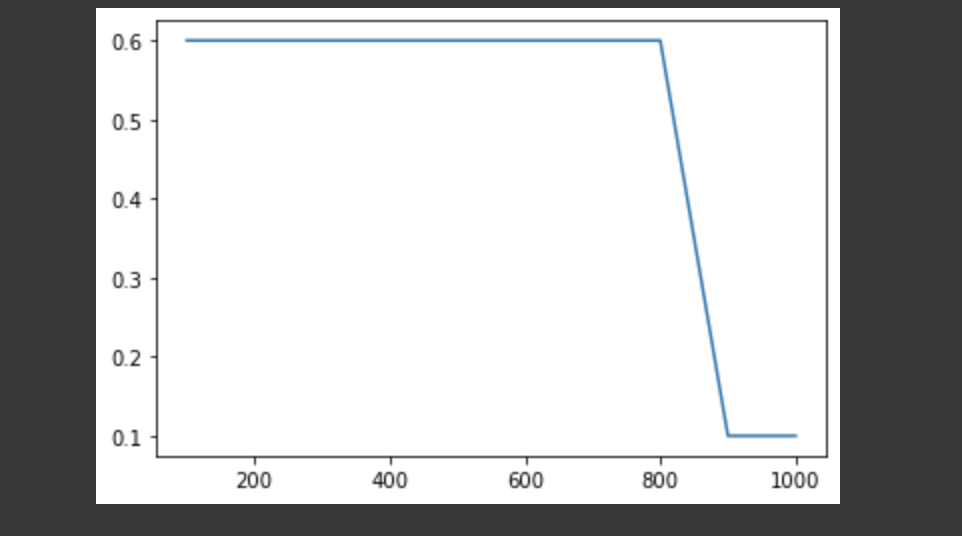

При выборе модели использовалась кросс-валидация, лучше всех себя показал градиентный бустинг 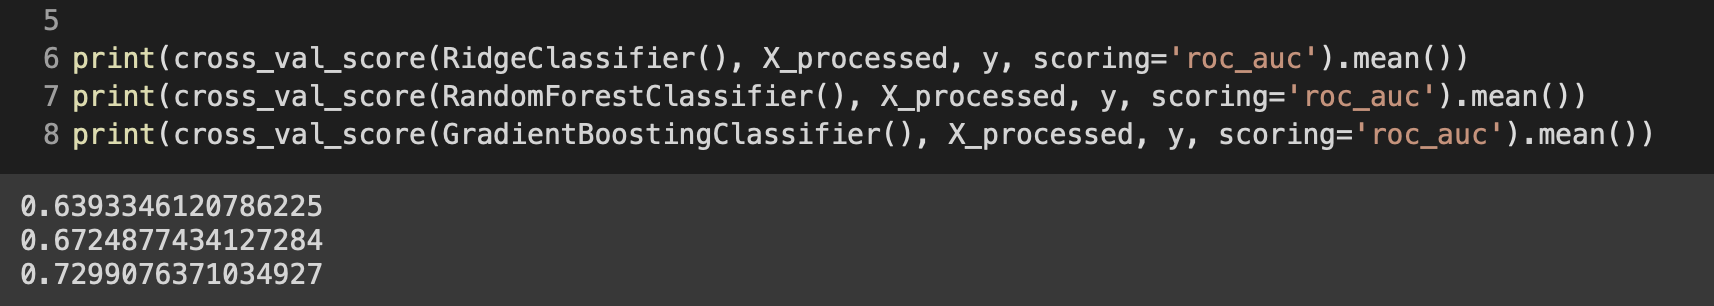

Техническое описание решения. 
Эксперименты помогли установить наиболее удачные методы предобработки данных.
1. Отброшены признаки у которых больше 50% значений NaN 
2. Заполнены недостающие численные значения средними
3. Заполнены недостающие категориальные значения наиболее часто встречающимся
4. Использован EditedNearestNeighbours для undersmapling'а.
5. Произведен отбор признаков с помощью RandomForest и SelectFromModel. Таким образом, количество признаков уменьшено на 110
6. Использован градиентный бустинг с параметрами выше
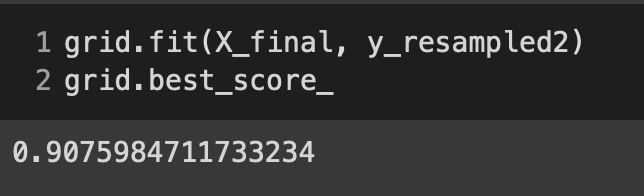

Признаки, внесшие наибольший вклад: Var26, Var199, Var218

Улучшать модель можно очень долго, приходят идеи такие, как, использовать стэкинг, попробовать другие имплементации градиентного бустинга. В силу того, что изначально очень много признаков и много из них неинформативны, очень сложно проводить EDA.